In [1]:
from matplotlib import pyplot as plt
from utils.utils import *
import utils.promethee_functions as pf
import utils.clustering_functions as cf

utils.py Loading


In [ ]:
path = "../data/temp/all_stocks_5yr.csv"
# https://github.com/plotly/datasets/blob/master/all_stocks_5yr.csv

df = pd.read_csv(path)
dates = df.groupby("Name").apply(lambda x: x["date"].values)

df

C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\3475588919.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Name").apply(lambda x: x["date"].values)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [3]:
# Check that dates are the same for all stocks

def check_dates(dates):
    for i in range(1, len(dates)):
        if not np.array_equal(dates[i], dates[0]):
            return False
    return True

check_dates(dates)
    

C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\3893387334.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.array_equal(dates[i], dates[0]):


False

In [4]:
# Df is currently with the following columns: date, open, high, low, close, volume, Name
# Create a new df with name as index and open, high, low, close, volume, dates as columns
# Each cell is a np.array of the calues of the corresponding column for the stock

data = df.groupby("Name").apply(lambda x: x[["open", "high", "low", "close", "volume"]].values)

data


C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\1657010886.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = df.groupby("Name").apply(lambda x: x[["open", "high", "low", "close", "volume"]].values)


Name
A       [[45.07, 45.35, 45.0, 45.08, 1824755.0], [45.1...
AAL     [[15.07, 15.12, 14.63, 14.75, 8407500.0], [14....
AAP     [[78.34, 79.72, 78.01, 78.9, 1298137.0], [78.6...
AAPL    [[67.7142, 68.4014, 66.8928, 67.8542, 15816841...
ABBV    [[36.37, 36.42, 35.825, 36.25, 13858795.0], [3...
                              ...                        
XYL     [[27.01, 27.64, 27.01, 27.09, 1206284.0], [27....
YUM     [[63.7, 65.49, 63.66, 65.3, 7190051.0], [65.16...
ZBH     [[75.02, 75.99, 74.96, 75.85, 911179.0], [75.7...
ZION    [[24.03, 24.21, 23.95, 24.14, 2104483.0], [24....
ZTS     [[32.31, 33.48, 32.3, 33.05, 2599232.0], [33.0...
Length: 505, dtype: object

In [5]:
# from data, create a dataframe with the following columns:
# name, date, open, high, low, close, volume
# each cell is the numpy array of the values of the stock

data = pd.DataFrame(data, index=data.index, columns=["data"])
data["open"] = data["data"].apply(lambda x: x[:, 0])
data["high"] = data["data"].apply(lambda x: x[:, 1])
data["low"] = data["data"].apply(lambda x: x[:, 2])
data["close"] = data["data"].apply(lambda x: x[:, 3])
data["volume"] = data["data"].apply(lambda x: x[:, 4])



data

,data,open,high,low,close,volume
Name,,,,,,
A,"[[45.07, 45.35, 45.0, 45.08, 1824755.0], [45.1...","[45.07, 45.17, 44.81, 44.81, 44.72, 43.48, 42....","[45.35, 45.18, 44.95, 45.24, 44.78, 44.24, 43....","[45.0, 44.45, 44.5, 44.68, 44.36, 42.21, 42.21...","[45.08, 44.6, 44.62, 44.75, 44.58, 42.25, 43.0...","[1824755.0, 2915405.0, 2373731.0, 2052338.0, 3..."
AAL,"[[15.07, 15.12, 14.63, 14.75, 8407500.0], [14....","[15.07, 14.89, 14.45, 14.3, 14.94, 13.93, 14.3...","[15.12, 15.01, 14.51, 14.94, 14.96, 14.61, 14....","[14.63, 14.26, 14.1, 14.25, 13.16, 13.93, 14.0...","[14.75, 14.46, 14.27, 14.66, 13.99, 14.5, 14.2...","[8407500.0, 8882000.0, 8126000.0, 10259500.0, ..."
AAP,"[[78.34, 79.72, 78.01, 78.9, 1298137.0], [78.6...","[78.34, 78.65, 78.39, 78.9, 78.66, 78.83, 79.1...","[79.72, 78.91, 78.63, 79.13, 79.72, 79.18, 81....","[78.01, 77.23, 77.5132, 77.85, 78.585, 77.93, ...","[78.9, 78.39, 78.6, 78.97, 78.84, 79.0, 80.72,...","[1298137.0, 758016.0, 876859.0, 1038574.0, 100..."
AAPL,"[[67.7142, 68.4014, 66.8928, 67.8542, 15816841...","[67.7142, 68.0714, 68.5014, 66.7442, 66.3599, ...","[68.4014, 69.2771, 68.9114, 67.6628, 67.3771, ...","[66.8928, 67.6071, 66.8205, 66.1742, 66.2885, ...","[67.8542, 68.5614, 66.8428, 66.7156, 66.6556, ...","[158168416.0, 129029425.0, 151829363.0, 118721..."
ABBV,"[[36.37, 36.42, 35.825, 36.25, 13858795.0], [3...","[36.37, 36.13, 35.77, 35.42, 35.05, 36.93, 37....","[36.42, 36.18, 35.9, 35.57, 36.73, 37.81, 38.3...","[35.825, 35.75, 35.2, 35.15, 35.01, 36.93, 37....","[36.25, 35.85, 35.42, 35.27, 36.57, 37.58, 38....","[13858795.0, 6031957.0, 7473991.0, 4860053.0, ..."
...,...,...,...,...,...,...
XYL,"[[27.01, 27.64, 27.01, 27.09, 1206284.0], [27....","[27.01, 27.11, 27.52, 28.0, 28.22, 28.22, 28.3...","[27.64, 27.53, 28.1, 28.37, 28.615, 28.47, 28....","[27.01, 27.02, 27.48, 27.94, 28.205, 28.02, 28...","[27.09, 27.46, 27.95, 28.26, 28.47, 28.28, 28....","[1206284.0, 875010.0, 904935.0, 622205.0, 9270..."
YUM,"[[63.7, 65.49, 63.66, 65.3, 7190051.0], [65.16...","[63.7, 65.16, 64.58, 64.77, 64.27, 63.82, 64.2...","[65.49, 65.19, 65.06, 64.91, 64.536, 64.5, 65....","[63.66, 64.48, 64.06, 63.95, 63.77, 63.445, 63...","[65.3, 64.55, 64.75, 64.41, 63.89, 63.99, 65.1...","[7190051.0, 5352531.0, 4934311.0, 3999959.0, 3..."
ZBH,"[[75.02, 75.99, 74.96, 75.85, 911179.0], [75.7...","[75.02, 75.75, 75.65, 75.74, 75.86, 76.22, 75....","[75.99, 75.98, 75.82, 76.75, 76.4, 76.4, 76.31...","[74.96, 75.35, 75.35, 75.66, 75.75, 75.35, 74....","[75.85, 75.65, 75.44, 76.0, 76.34, 75.9, 76.11...","[911179.0, 665462.0, 1048252.0, 931746.0, 8601..."


In [6]:
dates = df.groupby("Name").apply(lambda x: x["date"].values)

data["date"] = dates
data = data.drop(columns=["data"])

C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\540677844.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Name").apply(lambda x: x["date"].values)


In [7]:
data

,open,high,low,close,volume,date
Name,,,,,,
A,"[45.07, 45.17, 44.81, 44.81, 44.72, 43.48, 42....","[45.35, 45.18, 44.95, 45.24, 44.78, 44.24, 43....","[45.0, 44.45, 44.5, 44.68, 44.36, 42.21, 42.21...","[45.08, 44.6, 44.62, 44.75, 44.58, 42.25, 43.0...","[1824755.0, 2915405.0, 2373731.0, 2052338.0, 3...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
AAL,"[15.07, 14.89, 14.45, 14.3, 14.94, 13.93, 14.3...","[15.12, 15.01, 14.51, 14.94, 14.96, 14.61, 14....","[14.63, 14.26, 14.1, 14.25, 13.16, 13.93, 14.0...","[14.75, 14.46, 14.27, 14.66, 13.99, 14.5, 14.2...","[8407500.0, 8882000.0, 8126000.0, 10259500.0, ...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
AAP,"[78.34, 78.65, 78.39, 78.9, 78.66, 78.83, 79.1...","[79.72, 78.91, 78.63, 79.13, 79.72, 79.18, 81....","[78.01, 77.23, 77.5132, 77.85, 78.585, 77.93, ...","[78.9, 78.39, 78.6, 78.97, 78.84, 79.0, 80.72,...","[1298137.0, 758016.0, 876859.0, 1038574.0, 100...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
AAPL,"[67.7142, 68.0714, 68.5014, 66.7442, 66.3599, ...","[68.4014, 69.2771, 68.9114, 67.6628, 67.3771, ...","[66.8928, 67.6071, 66.8205, 66.1742, 66.2885, ...","[67.8542, 68.5614, 66.8428, 66.7156, 66.6556, ...","[158168416.0, 129029425.0, 151829363.0, 118721...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
ABBV,"[36.37, 36.13, 35.77, 35.42, 35.05, 36.93, 37....","[36.42, 36.18, 35.9, 35.57, 36.73, 37.81, 38.3...","[35.825, 35.75, 35.2, 35.15, 35.01, 36.93, 37....","[36.25, 35.85, 35.42, 35.27, 36.57, 37.58, 38....","[13858795.0, 6031957.0, 7473991.0, 4860053.0, ...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
...,...,...,...,...,...,...
XYL,"[27.01, 27.11, 27.52, 28.0, 28.22, 28.22, 28.3...","[27.64, 27.53, 28.1, 28.37, 28.615, 28.47, 28....","[27.01, 27.02, 27.48, 27.94, 28.205, 28.02, 28...","[27.09, 27.46, 27.95, 28.26, 28.47, 28.28, 28....","[1206284.0, 875010.0, 904935.0, 622205.0, 9270...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
YUM,"[63.7, 65.16, 64.58, 64.77, 64.27, 63.82, 64.2...","[65.49, 65.19, 65.06, 64.91, 64.536, 64.5, 65....","[63.66, 64.48, 64.06, 63.95, 63.77, 63.445, 63...","[65.3, 64.55, 64.75, 64.41, 63.89, 63.99, 65.1...","[7190051.0, 5352531.0, 4934311.0, 3999959.0, 3...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
ZBH,"[75.02, 75.75, 75.65, 75.74, 75.86, 76.22, 75....","[75.99, 75.98, 75.82, 76.75, 76.4, 76.4, 76.31...","[74.96, 75.35, 75.35, 75.66, 75.75, 75.35, 74....","[75.85, 75.65, 75.44, 76.0, 76.34, 75.9, 76.11...","[911179.0, 665462.0, 1048252.0, 931746.0, 8601...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."


In [12]:
def sort_data(data):
    """ 
        The idea here is to only keep the stocks that have the same dates each time
    """
    filtered_data = data.copy()
    for i in range(len(data)):
        if not np.array_equal(data["date"].iloc[i], data["date"].iloc[0]):
            filtered_data = filtered_data.drop(data.index[i])
    return filtered_data

filtered_data = sort_data(data)


In [13]:
filtered_data

,open,high,low,close,volume,date
Name,,,,,,
A,"[45.07, 45.17, 44.81, 44.81, 44.72, 43.48, 42....","[45.35, 45.18, 44.95, 45.24, 44.78, 44.24, 43....","[45.0, 44.45, 44.5, 44.68, 44.36, 42.21, 42.21...","[45.08, 44.6, 44.62, 44.75, 44.58, 42.25, 43.0...","[1824755.0, 2915405.0, 2373731.0, 2052338.0, 3...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
AAL,"[15.07, 14.89, 14.45, 14.3, 14.94, 13.93, 14.3...","[15.12, 15.01, 14.51, 14.94, 14.96, 14.61, 14....","[14.63, 14.26, 14.1, 14.25, 13.16, 13.93, 14.0...","[14.75, 14.46, 14.27, 14.66, 13.99, 14.5, 14.2...","[8407500.0, 8882000.0, 8126000.0, 10259500.0, ...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
AAP,"[78.34, 78.65, 78.39, 78.9, 78.66, 78.83, 79.1...","[79.72, 78.91, 78.63, 79.13, 79.72, 79.18, 81....","[78.01, 77.23, 77.5132, 77.85, 78.585, 77.93, ...","[78.9, 78.39, 78.6, 78.97, 78.84, 79.0, 80.72,...","[1298137.0, 758016.0, 876859.0, 1038574.0, 100...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
AAPL,"[67.7142, 68.0714, 68.5014, 66.7442, 66.3599, ...","[68.4014, 69.2771, 68.9114, 67.6628, 67.3771, ...","[66.8928, 67.6071, 66.8205, 66.1742, 66.2885, ...","[67.8542, 68.5614, 66.8428, 66.7156, 66.6556, ...","[158168416.0, 129029425.0, 151829363.0, 118721...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
ABBV,"[36.37, 36.13, 35.77, 35.42, 35.05, 36.93, 37....","[36.42, 36.18, 35.9, 35.57, 36.73, 37.81, 38.3...","[35.825, 35.75, 35.2, 35.15, 35.01, 36.93, 37....","[36.25, 35.85, 35.42, 35.27, 36.57, 37.58, 38....","[13858795.0, 6031957.0, 7473991.0, 4860053.0, ...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
...,...,...,...,...,...,...
XYL,"[27.01, 27.11, 27.52, 28.0, 28.22, 28.22, 28.3...","[27.64, 27.53, 28.1, 28.37, 28.615, 28.47, 28....","[27.01, 27.02, 27.48, 27.94, 28.205, 28.02, 28...","[27.09, 27.46, 27.95, 28.26, 28.47, 28.28, 28....","[1206284.0, 875010.0, 904935.0, 622205.0, 9270...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
YUM,"[63.7, 65.16, 64.58, 64.77, 64.27, 63.82, 64.2...","[65.49, 65.19, 65.06, 64.91, 64.536, 64.5, 65....","[63.66, 64.48, 64.06, 63.95, 63.77, 63.445, 63...","[65.3, 64.55, 64.75, 64.41, 63.89, 63.99, 65.1...","[7190051.0, 5352531.0, 4934311.0, 3999959.0, 3...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."
ZBH,"[75.02, 75.75, 75.65, 75.74, 75.86, 76.22, 75....","[75.99, 75.98, 75.82, 76.75, 76.4, 76.4, 76.31...","[74.96, 75.35, 75.35, 75.66, 75.75, 75.35, 74....","[75.85, 75.65, 75.44, 76.0, 76.34, 75.9, 76.11...","[911179.0, 665462.0, 1048252.0, 931746.0, 8601...","[2013-02-08, 2013-02-11, 2013-02-12, 2013-02-1..."


In [14]:
check_dates(filtered_data["date"].values)

True

In [ ]:
def read_stock_data(path):
    """ 
        Read the stock data from the csv file and return a dataframe with the following columns:
        name (index), open, high, low, close, volume
        each cell is the numpy array of the values of the stock over time
        It also returns the dates of the stocks (for plotting purposes)
    """

    def check_dates(dates):
        """ 
            Check that dates are the same for all stocks (necessary condition for applying the promethee method)
        """
        for i in range(1, len(dates)):
            if not np.array_equal(dates[i], dates[0]):
                return False
        return True

    def filter_by_dates(data):
        """ 
            The idea here is to only keep the stocks that have the same dates each time
        """
        filtered_data = data.copy()
        for i in range(len(data)):
            if not np.array_equal(data["date"].iloc[i], data["date"].iloc[0]):
                filtered_data = filtered_data.drop(data.index[i])
        return filtered_data

    # Read the data
    df = pd.read_csv(path)

    # Get the dates
    dates = df.groupby("Name").apply(lambda x: x["date"].values)
    
    # Create a new df with name as index and open, high, low, close, volume, dates as columns
    # Each cell is a np.array of the calues of the corresponding column for the stock
    data = df.groupby("Name").apply(lambda x: x[["open", "high", "low", "close", "volume"]].values)

    data = pd.DataFrame(data, index=data.index, columns=["data"])
    data["open"] = data["data"].apply(lambda x: x[:, 0])
    data["high"] = data["data"].apply(lambda x: x[:, 1])
    data["low"] = data["data"].apply(lambda x: x[:, 2])
    data["close"] = data["data"].apply(lambda x: x[:, 3])
    data["volume"] = data["data"].apply(lambda x: x[:, 4])

    # Add the dates
    dates = df.groupby("Name").apply(lambda x: x["date"].values)
    data["date"] = dates

    # Check that dates are the same for all stocks
    if not check_dates(data["date"].values):
        print("Dates are not the same for all stocks, a filtering will be applied")
        data = filter_by_dates(data)

        if not check_dates(data["date"].values):
           raise Exception("Dates are still not the same for all stocks")
        else:
            print("Data filtered successfully!")
            dates = data["date"].values[0]
        

    # Drop the useless column
    data = data.drop(columns=["data", "date"])
    return data, dates


data, dates = read_stock_data(path)

C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\969977540.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Name").apply(lambda x: x["date"].values)


Dates are not the same for all stocks, a filtering will be applied
Data filtered successfully!


C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\969977540.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = df.groupby("Name").apply(lambda x: x[["open", "high", "low", "close", "volume"]].values)
C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\969977540.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Name").apply(lambda x: x["date"].values)


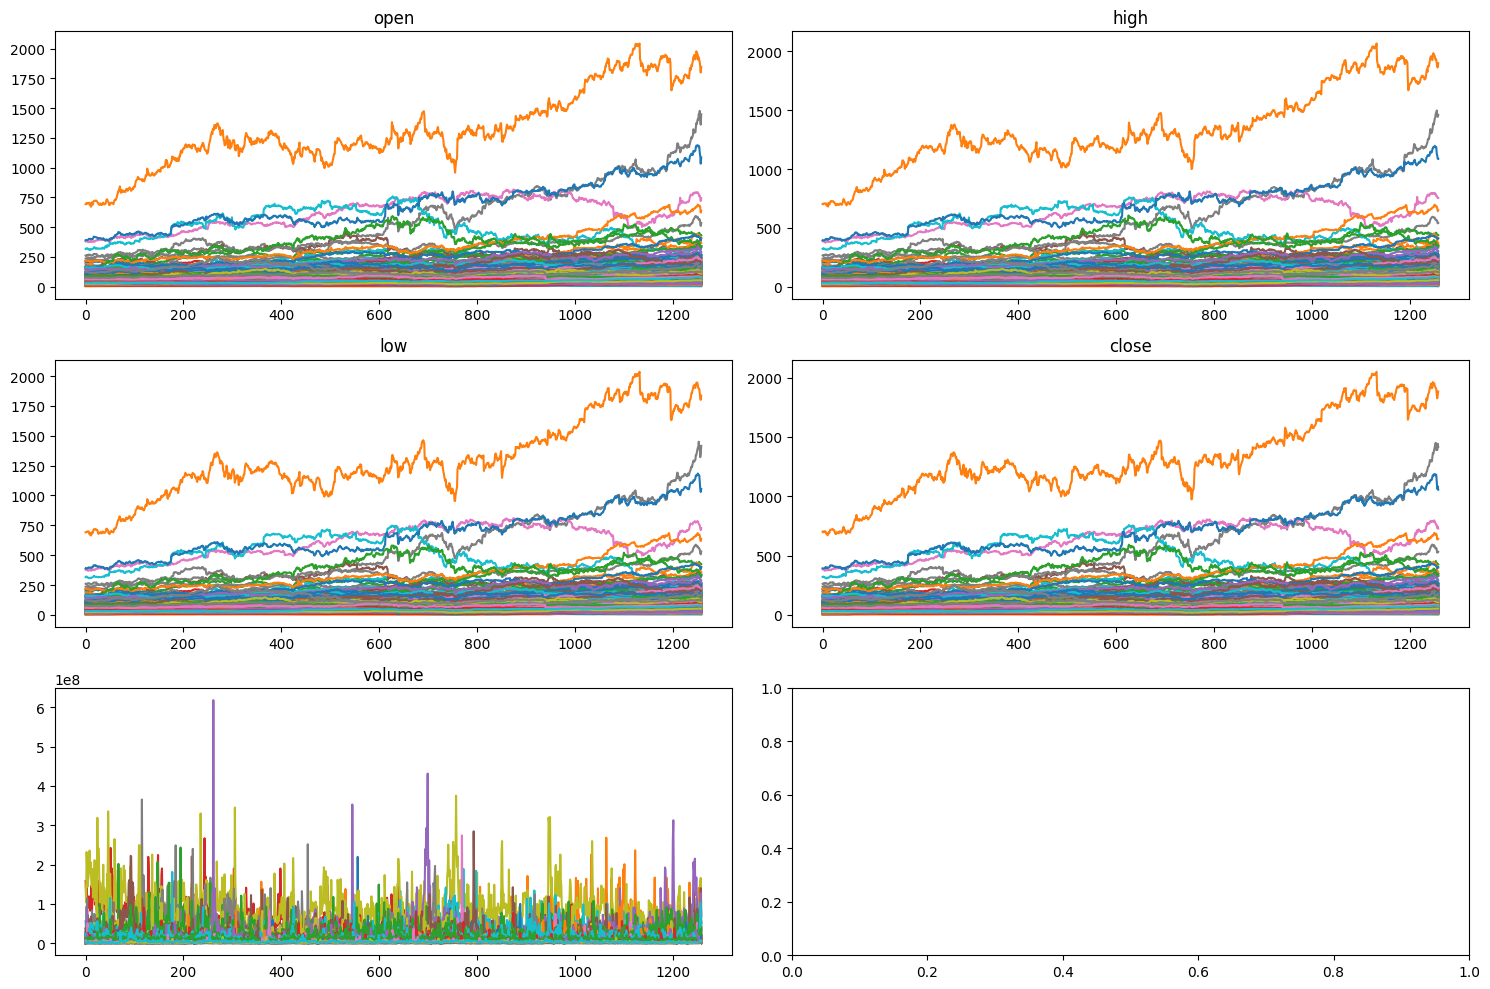

In [20]:
def plot_stock_data(data, dates, legend=False):
    """ 
    For each column, plot a graph with one color per row (country in this case)
    On the x-axis, the years (1990-2022)
    Using subplots with two columns
    """
    x = np.arange(len(dates))
    Nb_cols = len(data.columns)
    fig, axs = plt.subplots((Nb_cols + 1) // 2, 2, figsize=(15, 10))
    axs = axs.flatten()

    lines = []
    labels = []

    for i, col in enumerate(data.columns[:]):
        for j, row in data.iterrows():
            line, = axs[i].plot(x, row[col], label=row.name)
            if i == 0:  # Collect labels only once
                lines.append(line)
                labels.append(row.name)
        axs[i].set_title(col)
    
    if legend:
        fig.legend(lines, labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Add a single legend to the right
    
    plt.tight_layout()
    plt.show()

plot_stock_data(data, dates, legend=False)

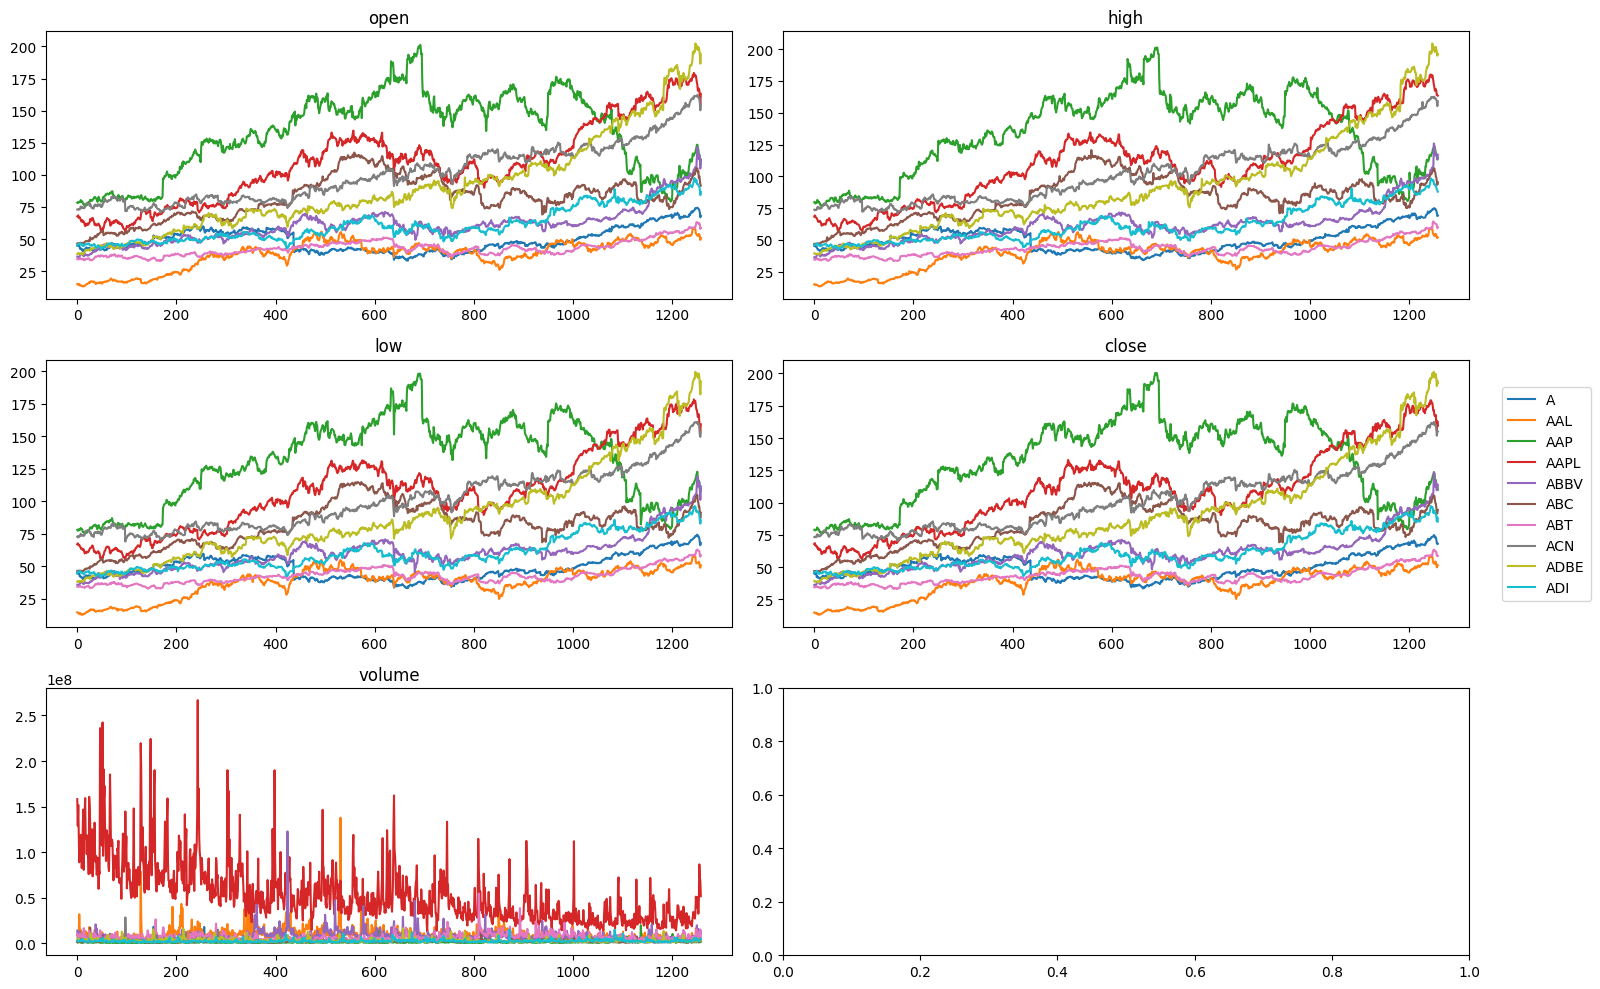

In [21]:
small_data = data.iloc[:10]
plot_stock_data(small_data, dates, legend=True)

In [25]:
def read_stock_data_company(path):
    """ 
        Read the stock data from the csv file and return a dataframe with the following columns:
        name (index), open, high, low, close, volume
        each cell is the numpy array of the values of the stock over time
        It also returns the dates of the stocks (for plotting purposes)
    """

    def check_dates(dates):
        """ 
            Check that dates are the same for all stocks (necessary condition for applying the promethee method)
        """
        for i in range(1, len(dates)):
            if not np.array_equal(dates[i], dates[0]):
                return False
        return True

    def filter_by_dates(data):
        """ 
            The idea here is to only keep the stocks that have the same dates each time
        """
        filtered_data = data.copy()
        for i in range(len(data)):
            if not np.array_equal(data["date"].iloc[i], data["date"].iloc[0]):
                filtered_data = filtered_data.drop(data.index[i])
        return filtered_data

    # Read the data
    df = pd.read_csv(path)

    # Get the dates
    dates = df.groupby("Company").apply(lambda x: x["Date"].values)
    
    # Create a new df with name as index and open, high, low, close, volume, dates as columns
    # Each cell is a np.array of the calues of the corresponding column for the stock
    data = df.groupby("Company").apply(lambda x: x[["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]].values)

    data = pd.DataFrame(data, index=data.index, columns=["data"])
    data["open"] = data["data"].apply(lambda x: x[:, 0])
    data["high"] = data["data"].apply(lambda x: x[:, 1])
    data["low"] = data["data"].apply(lambda x: x[:, 2])
    data["close"] = data["data"].apply(lambda x: x[:, 3])
    data["volume"] = data["data"].apply(lambda x: x[:, 4])
    data["dividends"] = data["data"].apply(lambda x: x[:, 5])
    data["stock_splits"] = data["data"].apply(lambda x: x[:, 6])

    # Add the dates
    dates = df.groupby("Company").apply(lambda x: x["Date"].values)
    data["date"] = dates

    # Check that dates are the same for all stocks
    if not check_dates(data["date"].values):
        print("Dates are not the same for all stocks, a filtering will be applied")
        data = filter_by_dates(data)

        if not check_dates(data["date"].values):
           raise Exception("Dates are still not the same for all stocks")
        else:
            print("Data filtered successfully!")
            dates = data["date"].values[0]
        

    # Drop the useless column
    data = data.drop(columns=["data", "date"])
    return data, dates


path2 = "../data/temp/stock_details_5_years.csv"

data, dates = read_stock_data_company(path2)

C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\1016246875.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Company").apply(lambda x: x["Date"].values)
C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\1016246875.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = df.groupby("Company").apply(lambda x: x[["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]

Dates are not the same for all stocks, a filtering will be applied
Data filtered successfully!


C:\Users\raphu\AppData\Local\Temp\ipykernel_32592\1016246875.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dates = df.groupby("Company").apply(lambda x: x["Date"].values)


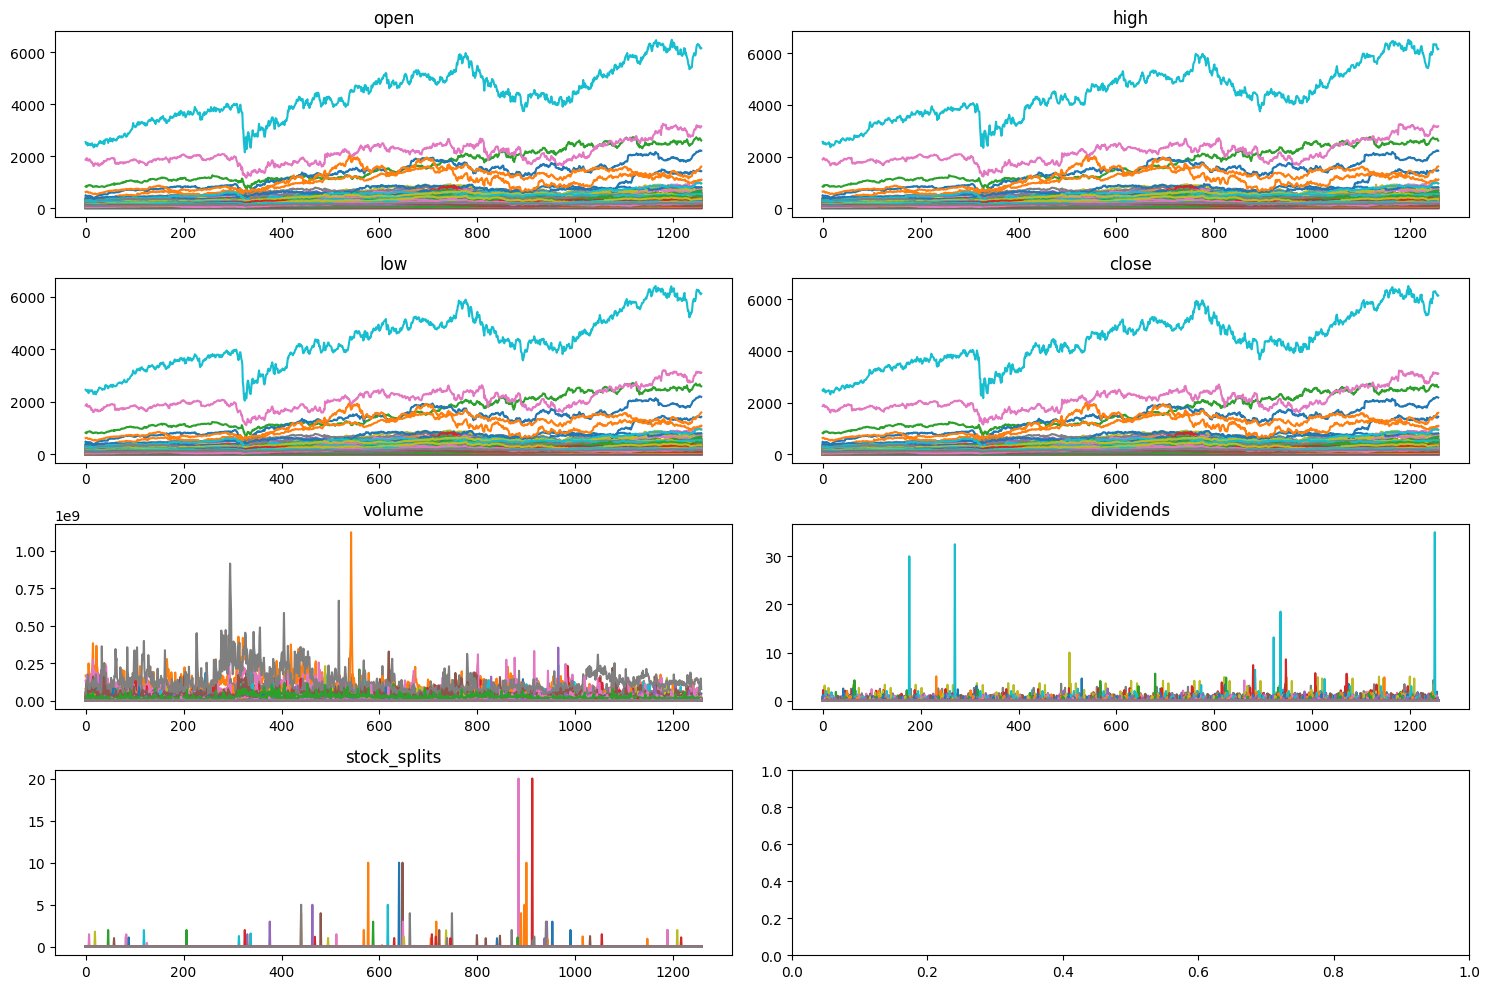

In [26]:
plot_stock_data(data, dates, legend=False)

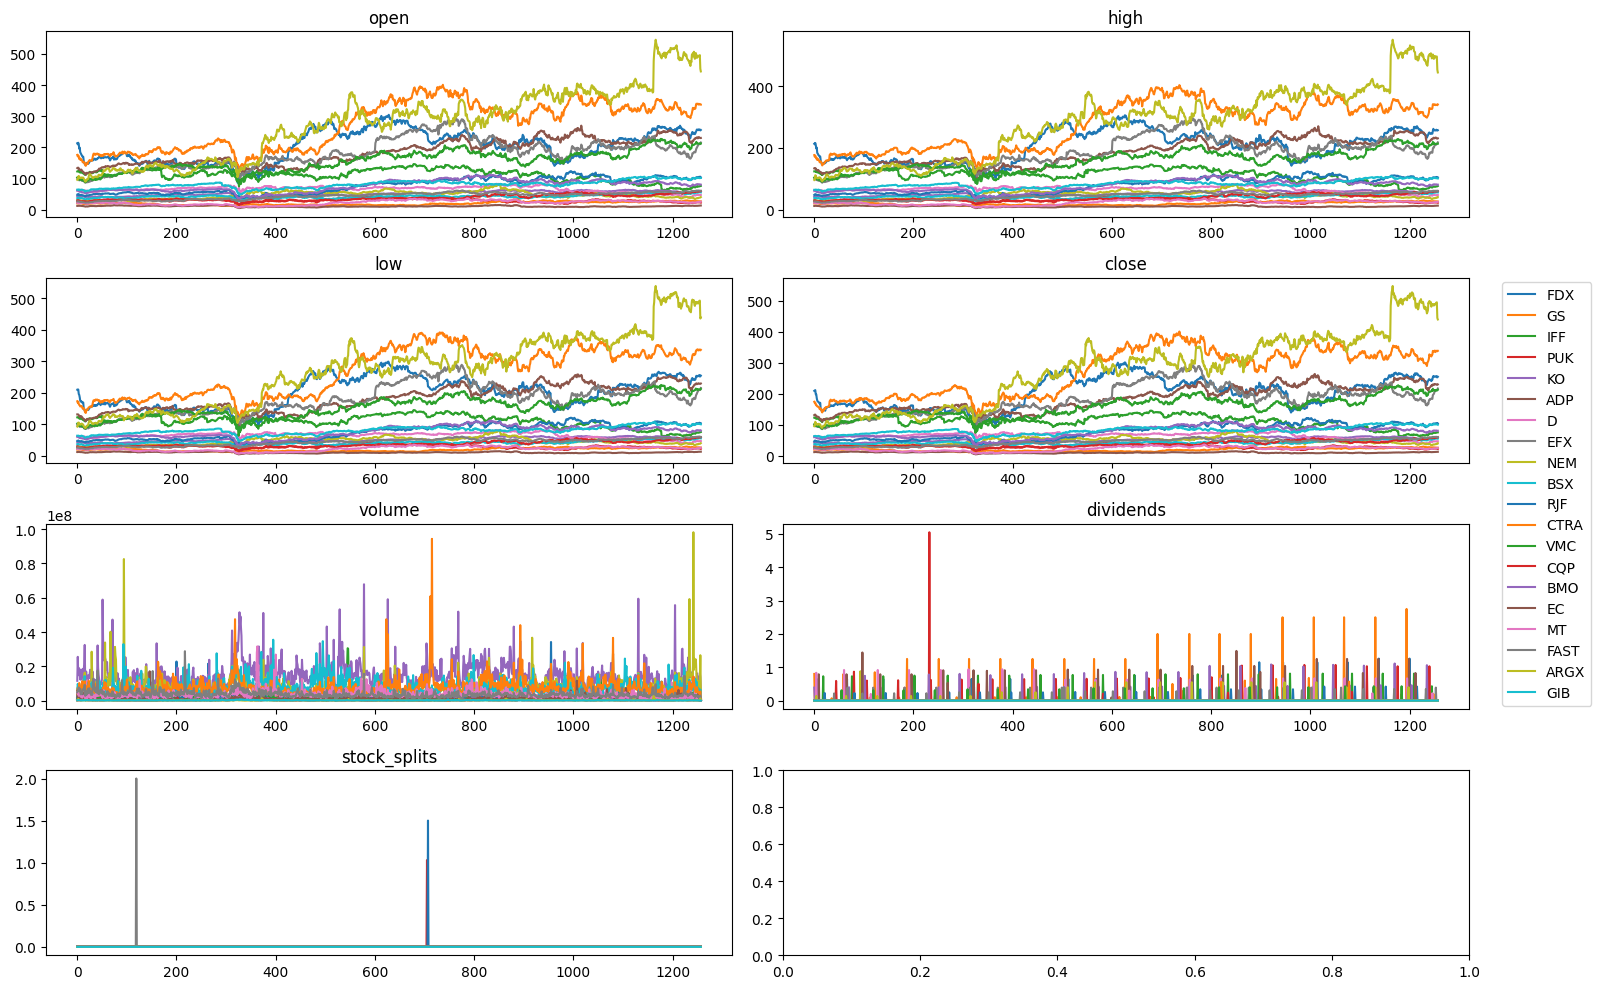

In [28]:
small_data = data.sample(20)
plot_stock_data(small_data, dates, legend=True)